In [41]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [42]:
df=pd.read_csv("../data/Telecom data github project 2.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# DATA PREPROCESSING PART 1

In [43]:
df.shape

(7043, 21)

In [44]:
df.duplicated().sum()

np.int64(0)

In [45]:
df.drop_duplicates(inplace=True)
df.shape

(7043, 21)

In [46]:
df.isnull().sum()
#no null values for now as total charges is object data type converting them into numeric and then check again

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [47]:
df.dtypes


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [48]:
df.TotalCharges=pd.to_numeric(df['TotalCharges'],errors='coerce')
df.TotalCharges.isnull().sum()
#null values-11 in TotalCharges

np.int64(11)

In [49]:
df.dropna(inplace=True)


In [50]:
df.TotalCharges.isnull().sum()

np.int64(0)

In [51]:
for col, values in df.items():
    print(col,values.unique(),'\n')
    
#cols=df.columns
#for i in cols:
   # print(i,df[i].unique(),'\n')


customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK'] 

gender ['Female' 'Male'] 

SeniorCitizen [0 1] 

Partner ['Yes' 'No'] 

Dependents ['No' 'Yes'] 

tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39] 

PhoneService ['No' 'Yes'] 

MultipleLines ['No phone service' 'No' 'Yes'] 

InternetService ['DSL' 'Fiber optic' 'No'] 

OnlineSecurity ['No' 'Yes' 'No internet service'] 

OnlineBackup ['Yes' 'No' 'No internet service'] 

DeviceProtection ['No' 'Yes' 'No internet service'] 

TechSupport ['No' 'Yes' 'No internet service'] 

StreamingTV ['No' 'Yes' 'No internet service'] 

StreamingMovies ['No' 'Yes' 'No internet service'] 

Contract ['Month-to-month' 'One year' 'Two year'] 

PaperlessBilling ['Yes' 'No'] 

PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer

In [52]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [53]:
##EXPLORATORY DATA ANALYSIS

In the exploratory data analysis, I will be visualizing the data to get a better understanding of the data and to see if there are any trends or pattern in the data. First I will begin with looking at the distribution of the data and then I will look at the relationship between the independent variables and the target variable.

C:\Users\HP\AppData\Local\Temp\ipykernel_12808\3278520884.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\HP\AppData\Local\Temp\ipykernel_12808\3278520884.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df['Partner'].value_counts(),x=df['Partner'].unique(),ax=ax[1,0],palette='magma').set_title('Partner')
C:\Users\HP\AppData\Local\Temp\ipykernel_12808\3278520884.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df.Dependents.value_counts(),x=df.Dependents.unique(),ax=ax[1,1],palette='Blues').set_title('Dependents')


Text(0.5, 1.0, 'Dependents')

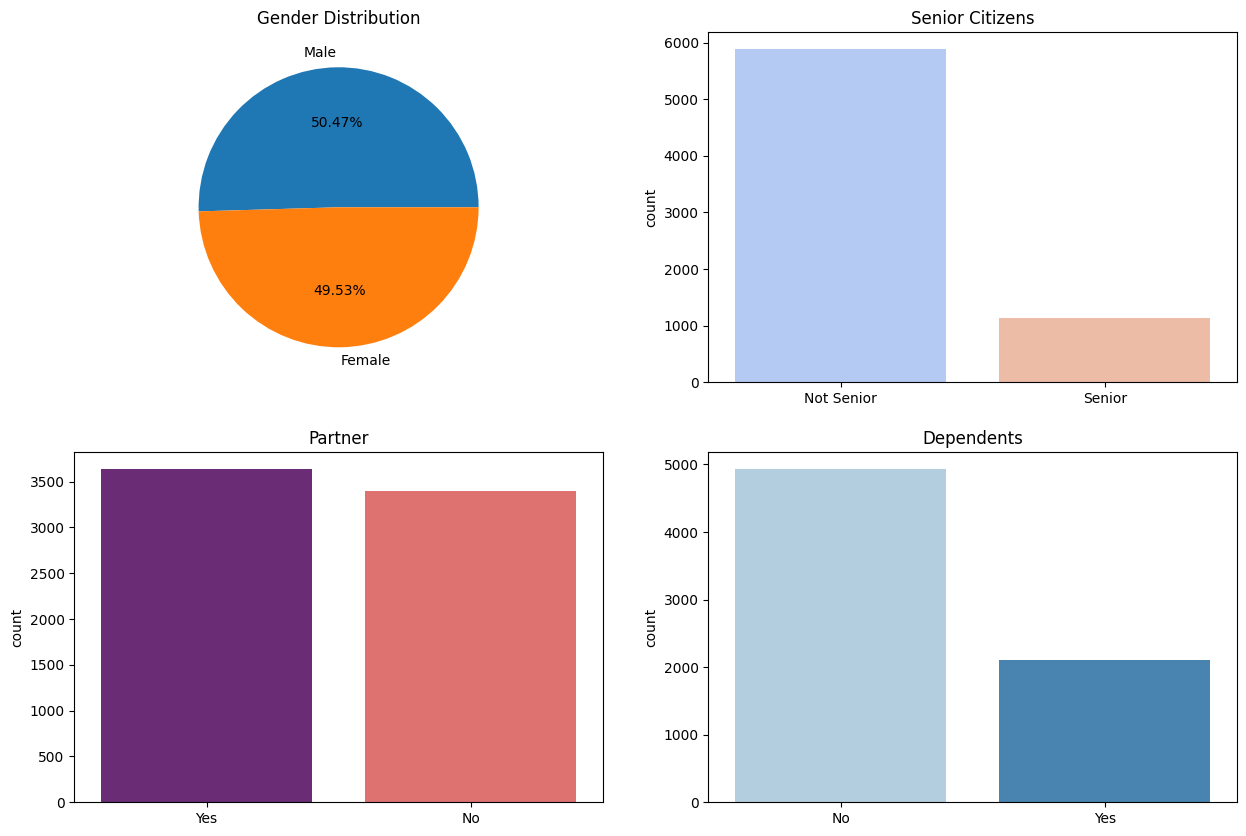

In [54]:
fig,ax=plt.subplots(2,2,figsize=(15,10))
ax[0,0].pie(df['gender'].value_counts(),labels=['Male','Female'],autopct='%1.2f%%')
ax[0,0].set_title('Gender Distribution')

sns.barplot(
    y=df['SeniorCitizen'].value_counts(),x=['Not Senior','Senior'],ax=ax[0,1],palette='coolwarm').set_title('Senior Citizens')

sns.barplot(y=df['Partner'].value_counts(),x=df['Partner'].unique(),ax=ax[1,0],palette='magma').set_title('Partner')

sns.barplot(y=df.Dependents.value_counts(),x=df.Dependents.unique(),ax=ax[1,1],palette='Blues').set_title('Dependents')

These graphs shows the customer demographics. The number of males and females is almost same, with few more males than females in the dataset. Majority of them are not senior citizen. Nearly 3500, customers have a partner and similar number of cutomers don't. Majority of the customers don't have dependents, but still a significant number does have dependents.

From these graphs, we get know about the customers demographics, which help us to get an idea of their psychology based on their age, relationship status, and dependents.

In [55]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# SERVICES

C:\Users\HP\AppData\Local\Temp\ipykernel_12808\1469504553.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df.OnlineBackup,ax=ax[1,1],palette='Blues').set_title('Online Backup')
C:\Users\HP\AppData\Local\Temp\ipykernel_12808\1469504553.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df.DeviceProtection,ax=ax[1,2],palette='magma').set_title('Device Protection')


Text(0.5, 1.0, 'Streaming Movies')

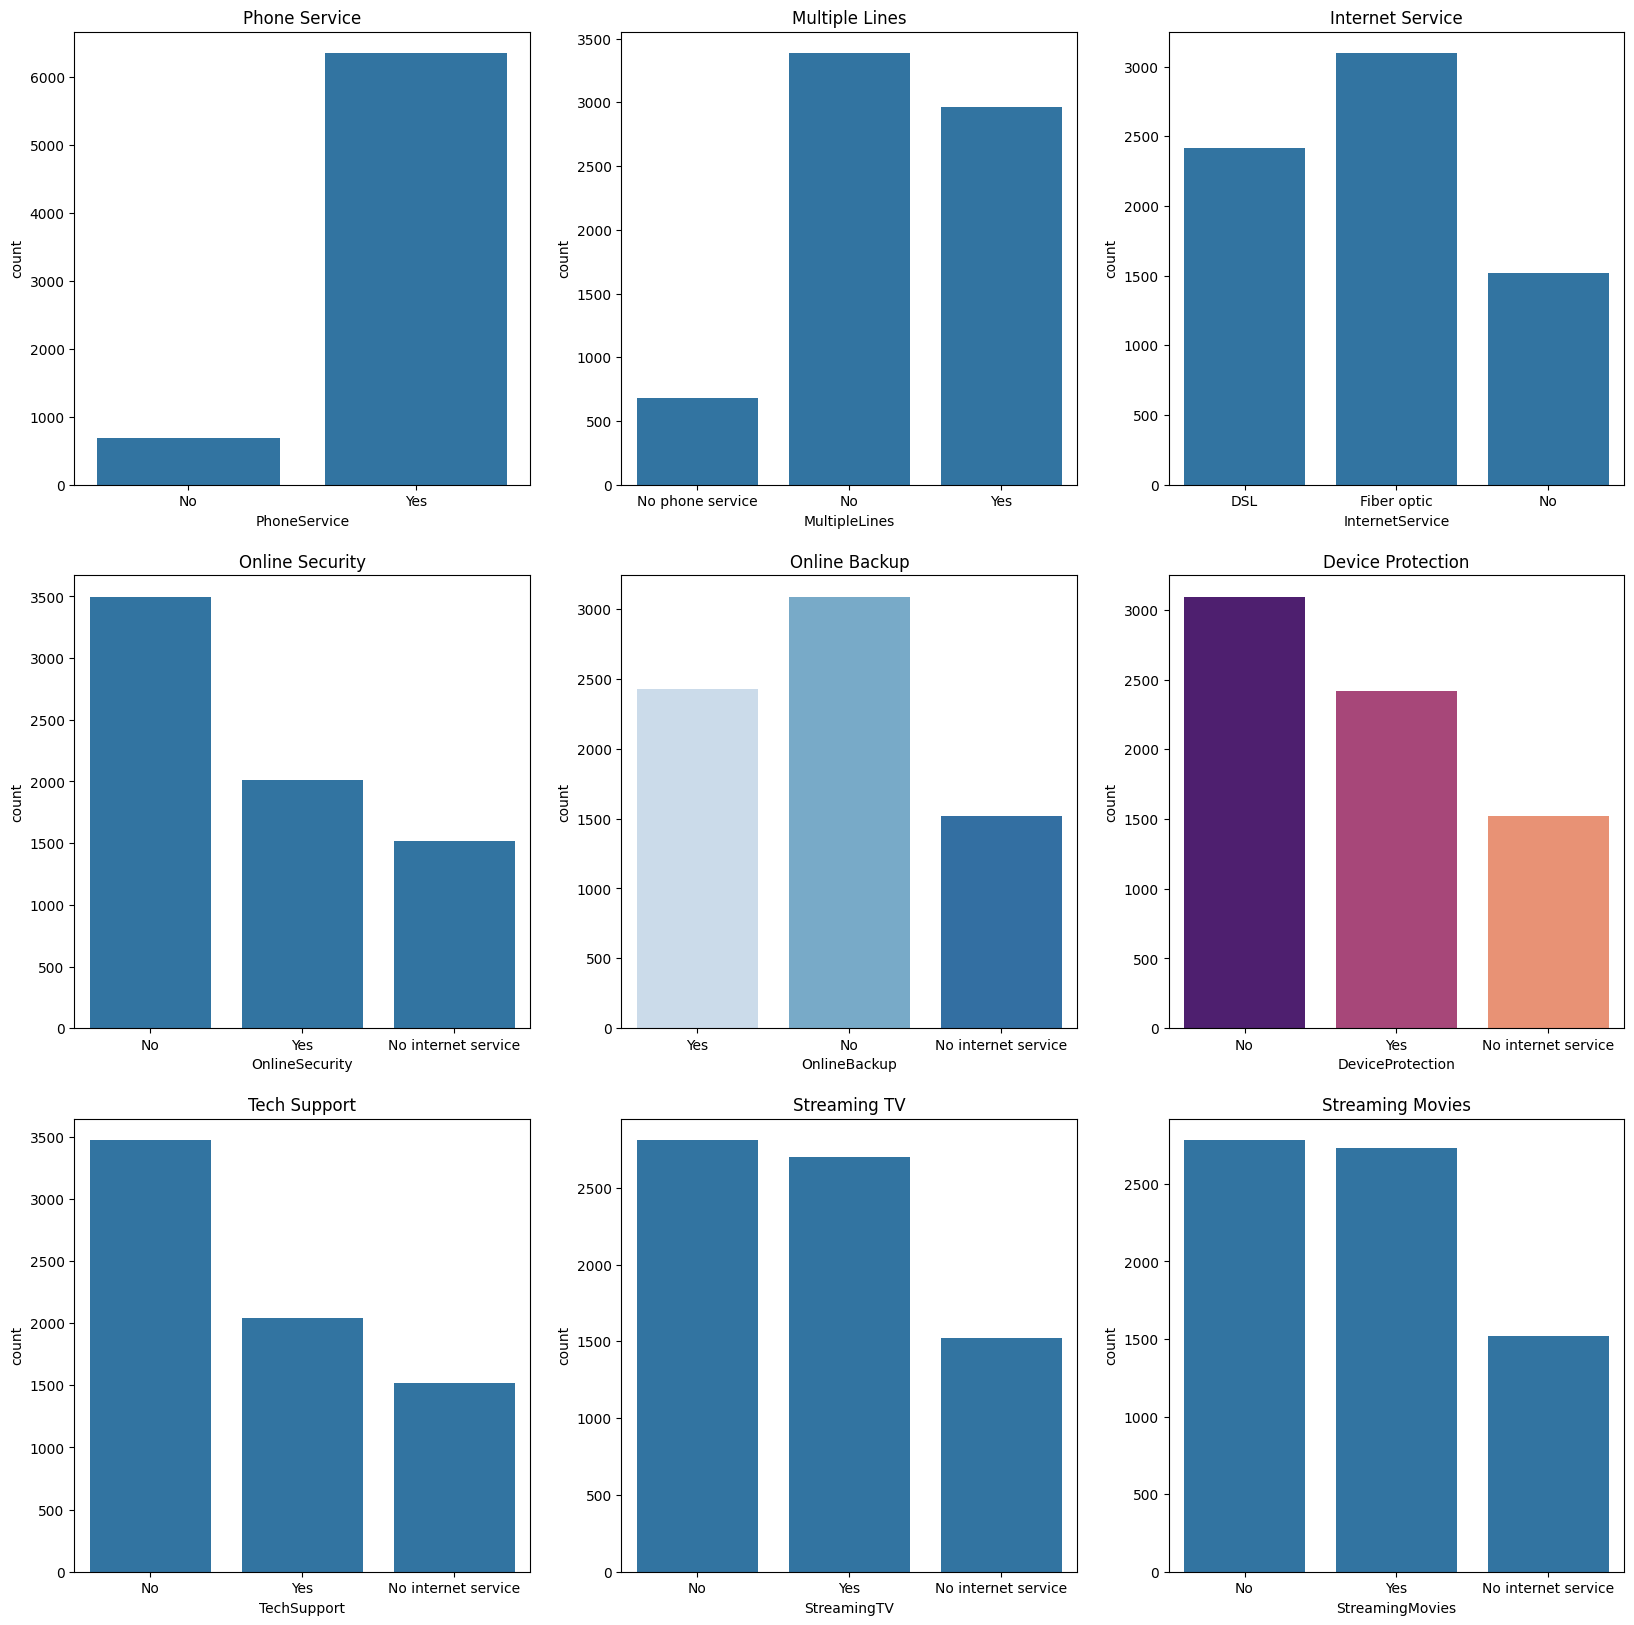

In [56]:
fig,ax=plt.subplots(3,3,figsize=(20,20))

#PhoneService
sns.countplot(x=df.PhoneService,ax=ax[0,0]).set_title('Phone Service')
#MultipleLines
sns.countplot(x=df.MultipleLines,ax=ax[0,1]).set_title('Multiple Lines')
#Internet Service
sns.countplot(x=df.InternetService,ax=ax[0,2]).set_title('Internet Service')
#Online Security
sns.countplot(x=df.OnlineSecurity,ax=ax[1,0]).set_title('Online Security')
#Online Backup
sns.countplot(x=df.OnlineBackup,ax=ax[1,1],palette='Blues').set_title('Online Backup')
#Device Protection
sns.countplot(x=df.DeviceProtection,ax=ax[1,2],palette='magma').set_title('Device Protection')
#Tech Support
sns.countplot(x=df.TechSupport,ax=ax[2,0]).set_title('Tech Support')
#Streaming TV
sns.countplot(x=df.StreamingTV,ax=ax[2,1]).set_title('Streaming TV')
#Streaming Movies
sns.countplot(x=df.StreamingMovies,ax=ax[2,2]).set_title('Streaming Movies')

# Tenure and Contract

Text(0.5, 1.0, 'Contract Type')

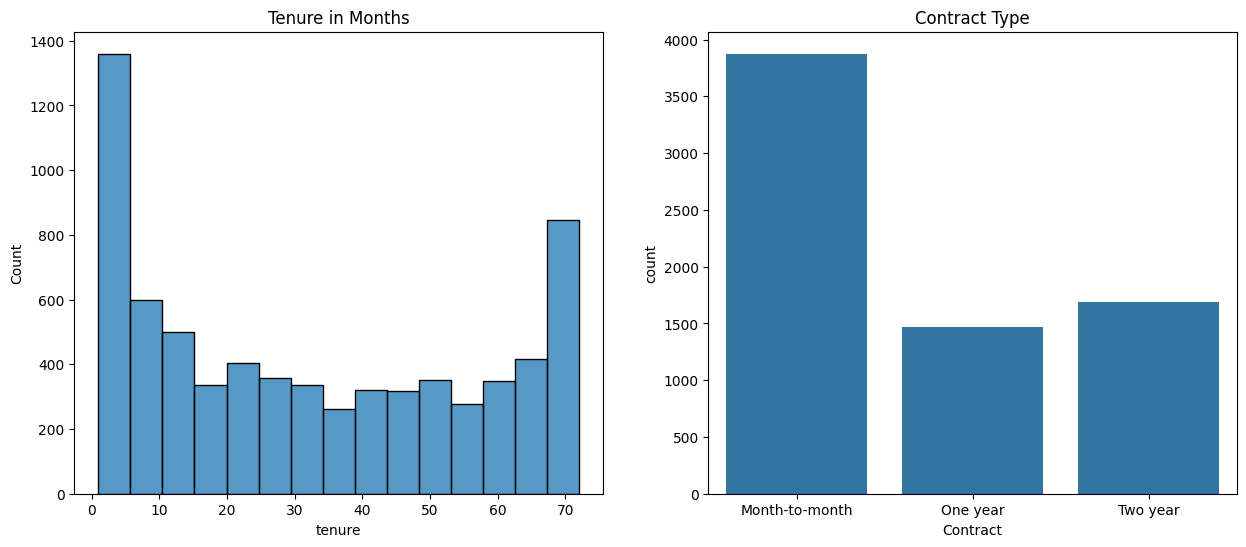

In [57]:
fig,ax=plt.subplots(1,2,figsize=(15,6))
sns.histplot(x='tenure',ax=ax[0]
             ,data=df).set_title('Tenure in Months')
sns.countplot(x=df.Contract,ax=ax[1]).set_title('Contract Type')

In the aboove graphs we can see the distribution of customer tenure with the comapny and the count of the type of contarct the company had with customer. Here, most if the customers had tenure less than a month, and most of the customers had a month-to-month contract with the company. Therfore, the customers with shorter tenure have month-to-month contract with the company. In addtion to that, a significant number of customers have tenure of nealry 70 months, which highlights the loyalty of the customers towards the company. Moreover, after month-to-month contract, the second most popular contract is two-year contract, which is opted by almost 1700 customers. Rest of the customers have tenure between 1-5 years.

# BILLING AND CHARGES

Text(0.5, 1.0, 'Total Charges')

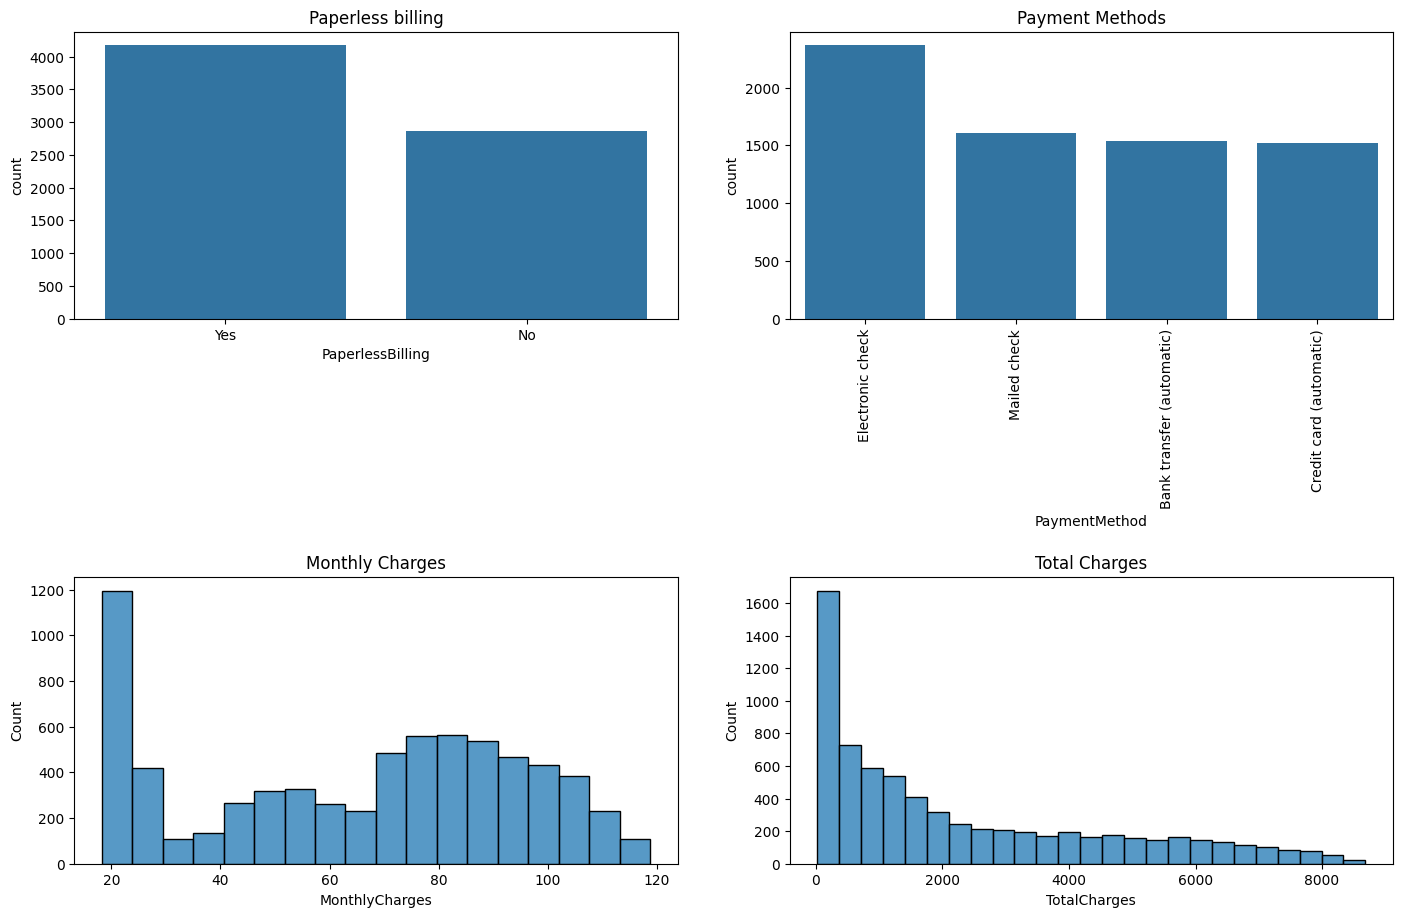

In [58]:
fig,ax=plt.subplots(2,2,figsize=(15,10))
fig.tight_layout(pad=5.0)
fig.subplots_adjust(hspace=0.9)
#paperless billing
sns.countplot(x=df['PaperlessBilling'],ax=ax[0,0]).set_title('Paperless billing')

#payment method
sns.countplot(x=df['PaymentMethod'],ax=ax[0,1]).set_title('Payment Methods')
ax[0,1].xaxis.set_tick_params(rotation=90)

#Monthly Charges
sns.histplot(x='MonthlyCharges',ax=ax[1,0],data=df).set_title('Monthly Charges')

#Total Charges
sns.histplot(x=df['TotalCharges'],ax=ax[1,1]).set_title('Total Charges')


These graphs shows the method of billing and the bill amounts. Most of the customers, nearly 4000 prefer paperless billing, however, a little bit over half of them pays through electronic check. But still a significant number of customers prefer paper bills. Apart from electronic checks, the other modes of payment accepted by the company includes - mailed checks, bank transfer and credit cards. Nearly 4500 customers altogether prefer these modes of payment.

Now, for the montly charges, huge number of customers pays near 20 dollars for the montly services and majority of the customer having total charges less than 200 dollars. However, there are considerable number of customers having monthly charges between 70 to 100 dollars and total charges between 200-800 dollars. Interestingly, If we look at the total charges graph, we can see that some customers have a total bill more than 4000 and even 8000 as well. This could be possible, if the customer has a long tenure or uses alot of services.

Now, I conclude that company mainly have customers with low charges, which means comany should focus on these customers by providing even more afforadable services.

# Churn Count

Text(0.5, 1.0, 'Churn Count')

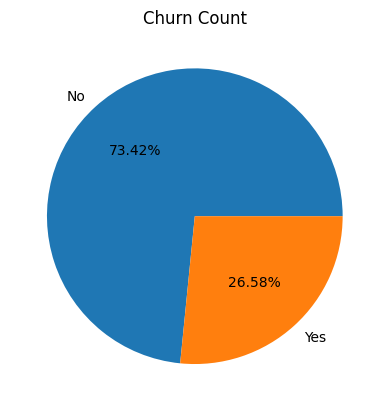

In [59]:
plt.pie(x=df['Churn'].value_counts(), labels=df['Churn'].unique(),autopct='%1.2f%%')
plt.title('Churn Count')

In the dataset, the number of churning customers is very less as compared to non churning. Only 26.49% churnned from the telecom company. This could be a potential proof, that company is quite good at retaning its customers.

Till now, I have visualized the data and got a better understanding of the data. Now, I will look at the relationship between the independent variables and the target variable.

Text(0.5, 1.0, 'Churn based on Dependents')

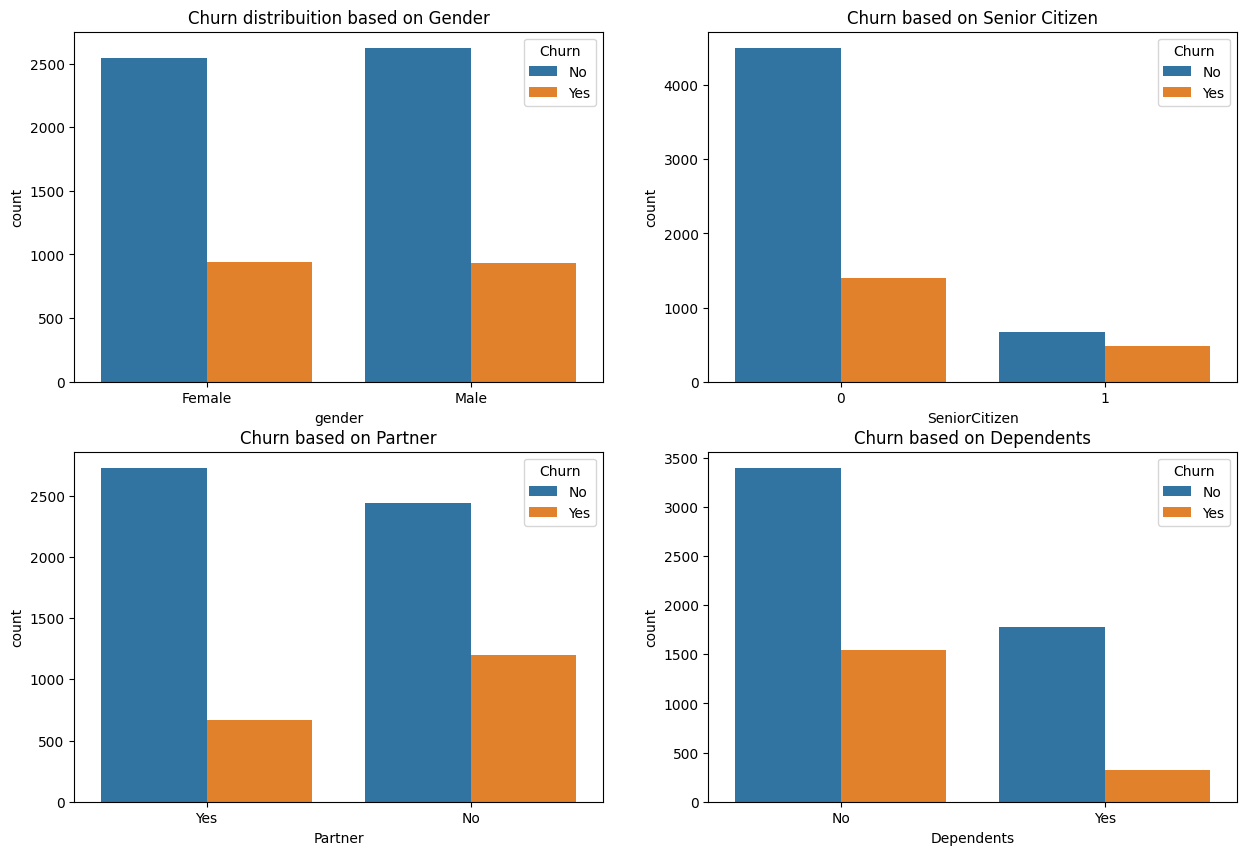

In [60]:
fig,ax=plt.subplots(2,2,figsize=(15,10))
#Gender distribution based on gender
sns.countplot(x='gender',data=df,ax=ax[0,0], hue='Churn').set_title('Churn distribuition based on Gender')

#Churn based on Senior Citizen
sns.countplot(x='SeniorCitizen',data=df,ax=ax[0,1],hue='Churn').set_title('Churn based on Senior Citizen')

#Churn based on Partner
sns.countplot(x='Partner',data=df,ax=ax[1,0],hue='Churn').set_title('Churn based on Partner')

#Churn based on Dependents
sns.countplot(x='Dependents',data=df,ax=ax[1,1],hue='Churn').set_title('Churn based on Dependents')


From these graphs, we can get know about the relation between customer demographics and customer churn. Both makes and females have equal number of churn count, so there is not relation between gender and customer churn. However, the senior citizens have a lesser churn count as compared to non senior citizens, which may be because their age and they don't want to hasle with the process of changing the telecom company. The customers with no partners have higher churn count as compared to customers with partners. Similarly, customers with no dependents have higher churn count as compared to customers with dependents.

From this I conclude that customers whom are single with no partner or have no dependents have higher churn count and senior citizens have lower churn count.

# Services and churn

Text(0.5, 1.0, 'Streaming Movies')

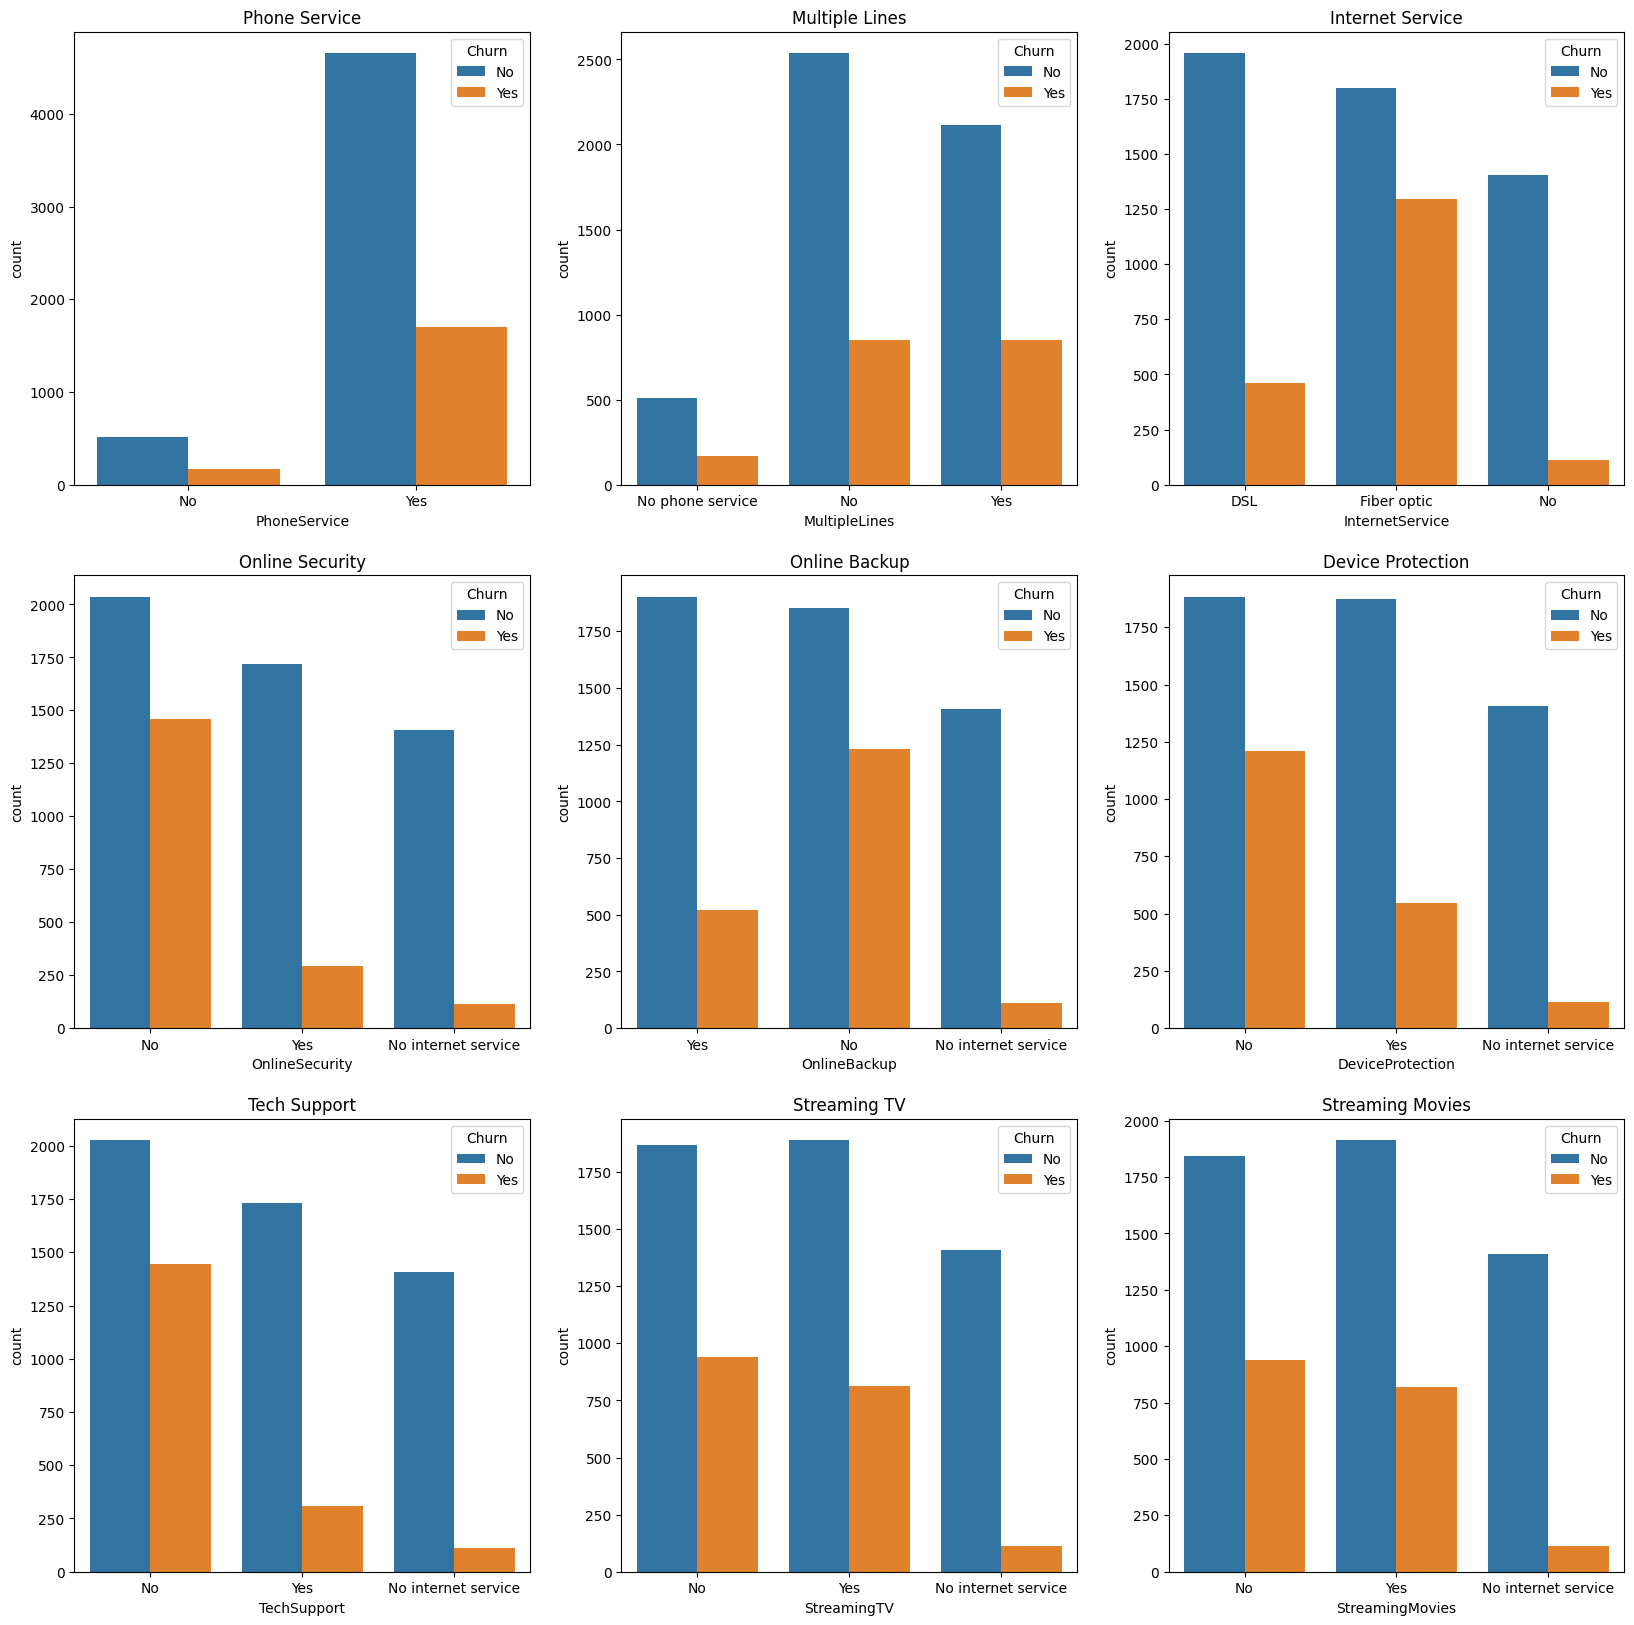

In [61]:
fig, ax = plt.subplots(3, 3, figsize=(20, 20))
#phone service
sns.countplot(x = df['PhoneService'], ax=ax[0,0], hue = df['Churn']).set_title('Phone Service')
ax[0,0].set_title('Phone Service')
#Multiple Lines
sns.countplot(x = df['MultipleLines'], ax=ax[0,1], hue = df['Churn']).set_title('Multiple Lines')
ax[0,1].set_title('Multiple Lines')
#Internet Service
sns.countplot(x = df['InternetService'], ax=ax[0,2], hue = df['Churn']).set_title('Internet Service')
ax[0,2].set_title('Internet Service')
#Online Security
sns.countplot(x = df['OnlineSecurity'], ax=ax[1,0], hue = df['Churn']).set_title('Online Security')
ax[1,0].set_title('Online Security')
#Online Backup
sns.countplot(x = df['OnlineBackup'], ax=ax[1,1], hue = df['Churn']).set_title('Online Backup')
ax[1,1].set_title('Online Backup')
#Device Protection
sns.countplot(x = df['DeviceProtection'], ax=ax[1,2], hue = df['Churn']).set_title('Device Protection')
ax[1,2].set_title('Device Protection')
#Tech Support
sns.countplot(x = df['TechSupport'], ax=ax[2,0], hue = df['Churn']).set_title('Tech Support')
ax[2,0].set_title('Tech Support')
#Streaming TV
sns.countplot(x = df['StreamingTV'], ax=ax[2,1], hue = df['Churn']).set_title('Streaming TV')
ax[2,1].set_title('Streaming TV')
#Streaming Movies
sns.countplot(x = df['StreamingMovies'], ax=ax[2,2], hue = df['Churn']).set_title('Streaming Movies')
ax[2,2].set_title('Streaming Movies')


These graphs visualizes the relation between customer churn based on services opted by the customer. In the phone and internet service, there is no relation between churn and service opted, however the churn count is higher for the customers, who have taken multiple lines. Coming to other services, where customers who have not taken Online backup or Device Protection service has higher churn count, than those who have opted. Moreover, the customers with streaming services have lower churn count as compared to those who have not opted for it.

Therefore, certain services have relation with the customer churn, which are multiple lines, Online Backup, Device Protection, and Streaming Services.

# Tenure/Contract and Churn

Text(0.5, 1.0, 'Contract and Churn')

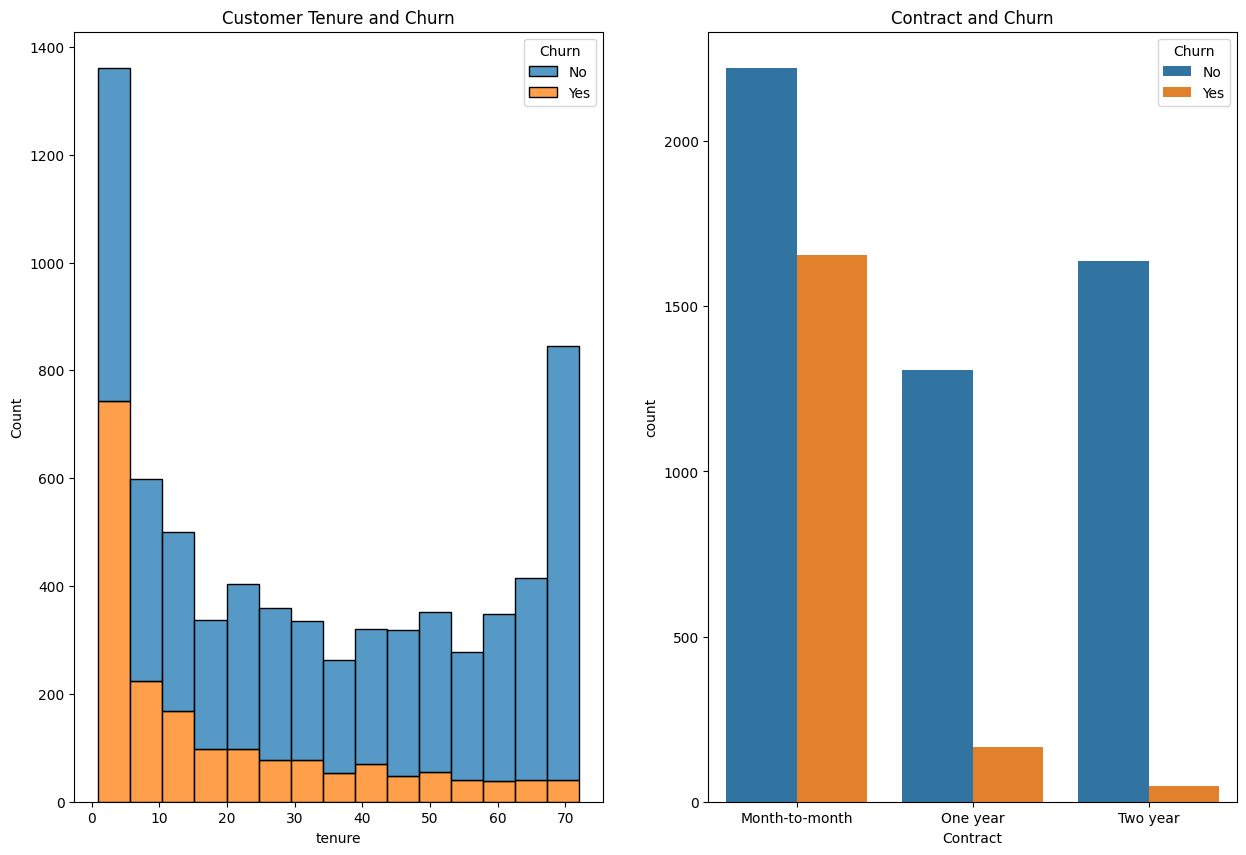

In [62]:
fig,ax=plt.subplots(1,2,figsize=(15,10))
sns.histplot(x='tenure', data=df, ax=ax[0],hue='Churn',multiple='stack').set_title('Customer Tenure and Churn')
sns.countplot(x='Contract',data=df,ax=ax[1],hue='Churn').set_title('Contract and Churn')

Looks like the customer tenure and contract has a inverse relation. The customers with shorter tenure or tenure less than 5 months have higher churn count. The churn count decreases with increase in tenure. Moreover, the customers with month-to-month contract have higher churn count as compared to those with one or two year contract which also proves that customer who have longer contract with the company have lower churn count.

# Billing and Churn

Text(0.5, 1.0, 'Total Charges')

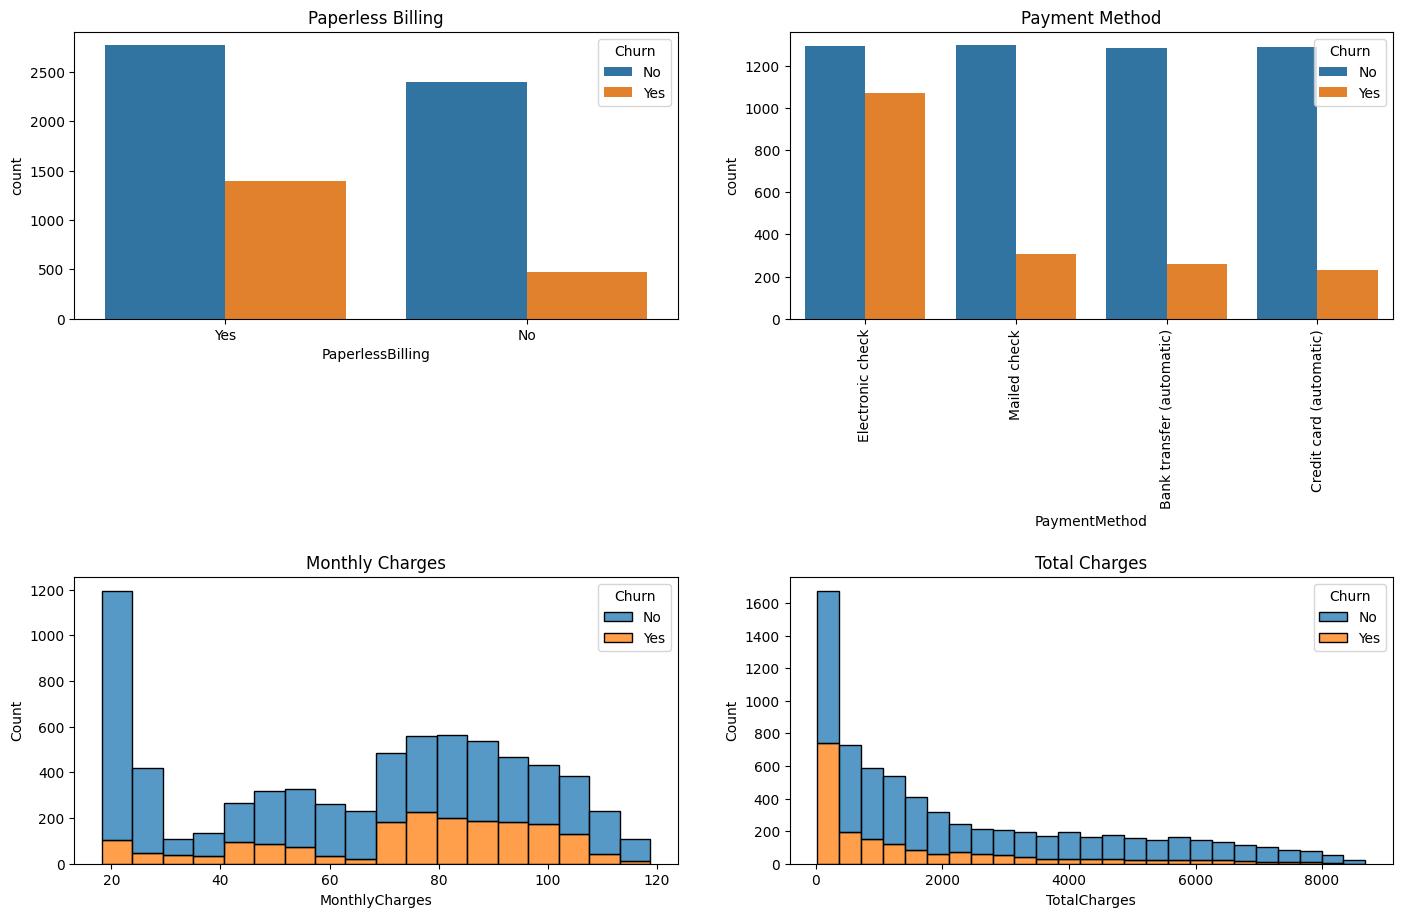

In [63]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
fig.tight_layout(pad=5.0)

#spacing between subplots
fig.subplots_adjust(hspace=0.9)


#papaerless billing
sns.countplot(x = df['PaperlessBilling'], ax=ax[0,0], hue = df['Churn']).set_title('Paperless Billing')

#Payment Method
sns.countplot(x = df['PaymentMethod'], ax=ax[0,1], hue = df['Churn']).set_title('Payment Method')
ax[0,1].xaxis.set_tick_params(rotation=90)

#Monthly Charges
sns.histplot(x = 'MonthlyCharges', data = df, ax = ax[1,0], hue = 'Churn', multiple= 'stack').set_title('Monthly Charges')

#Total Charges
sns.histplot(x = 'TotalCharges', data = df, ax = ax[1,1], hue = 'Churn', multiple= 'stack').set_title('Total Charges')

The paperless billing and payment method have not significant relation with the customer churn. However, the montly and total charges do have a interesting relation with the customer churn. The customers with higher monthly charges have higher churn count, which is quite obvious. But, the customers with higher total charges have lower churn count, which is quite interesting. This could be possible, if the customer has a long tenure or uses alot of services. Therefore, the company should focus on lowering the monthly charges for the customers in order to reduce the churn count.

# DATA PREPROCESSING PART 2

# Label encoding

In [64]:
from sklearn.preprocessing import LabelEncoder

#cols for label encoding
cols=df.columns[df.dtypes=='object']

le=LabelEncoder()

for i in cols:
    le.fit(df[i])
    df[i]=le.transform(df[i])
    print(i,df[i].unique(),'\n')

customerID [5365 3953 2558 ... 3358 5923 2221] 

gender [0 1] 

Partner [1 0] 

Dependents [0 1] 

PhoneService [0 1] 

MultipleLines [1 0 2] 

InternetService [0 1 2] 

OnlineSecurity [0 2 1] 

OnlineBackup [2 0 1] 

DeviceProtection [0 2 1] 

TechSupport [0 2 1] 

StreamingTV [0 2 1] 

StreamingMovies [0 2 1] 

Contract [0 1 2] 

PaperlessBilling [1 0] 

PaymentMethod [2 3 0 1] 

Churn [0 1] 



In [65]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
df[['tenure','MonthlyCharges','TotalCharges']]=sc.fit_transform(df[['tenure','MonthlyCharges','TotalCharges']])
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5365,0,0,1,0,-1.280248,0,1,0,0,...,0,0,0,0,0,1,2,-1.161694,-0.994194,0
1,3953,1,0,0,0,0.064303,1,0,0,2,...,2,0,0,0,1,0,3,-0.260878,-0.173740,0
2,2558,1,0,0,0,-1.239504,1,0,0,2,...,0,0,0,0,0,1,3,-0.363923,-0.959649,1
3,5524,1,0,0,0,0.512486,0,1,0,2,...,2,2,0,0,1,0,0,-0.747850,-0.195248,0
4,6500,0,0,0,0,-1.239504,1,0,1,0,...,0,0,0,0,0,1,2,0.196178,-0.940457,1


<Axes: >

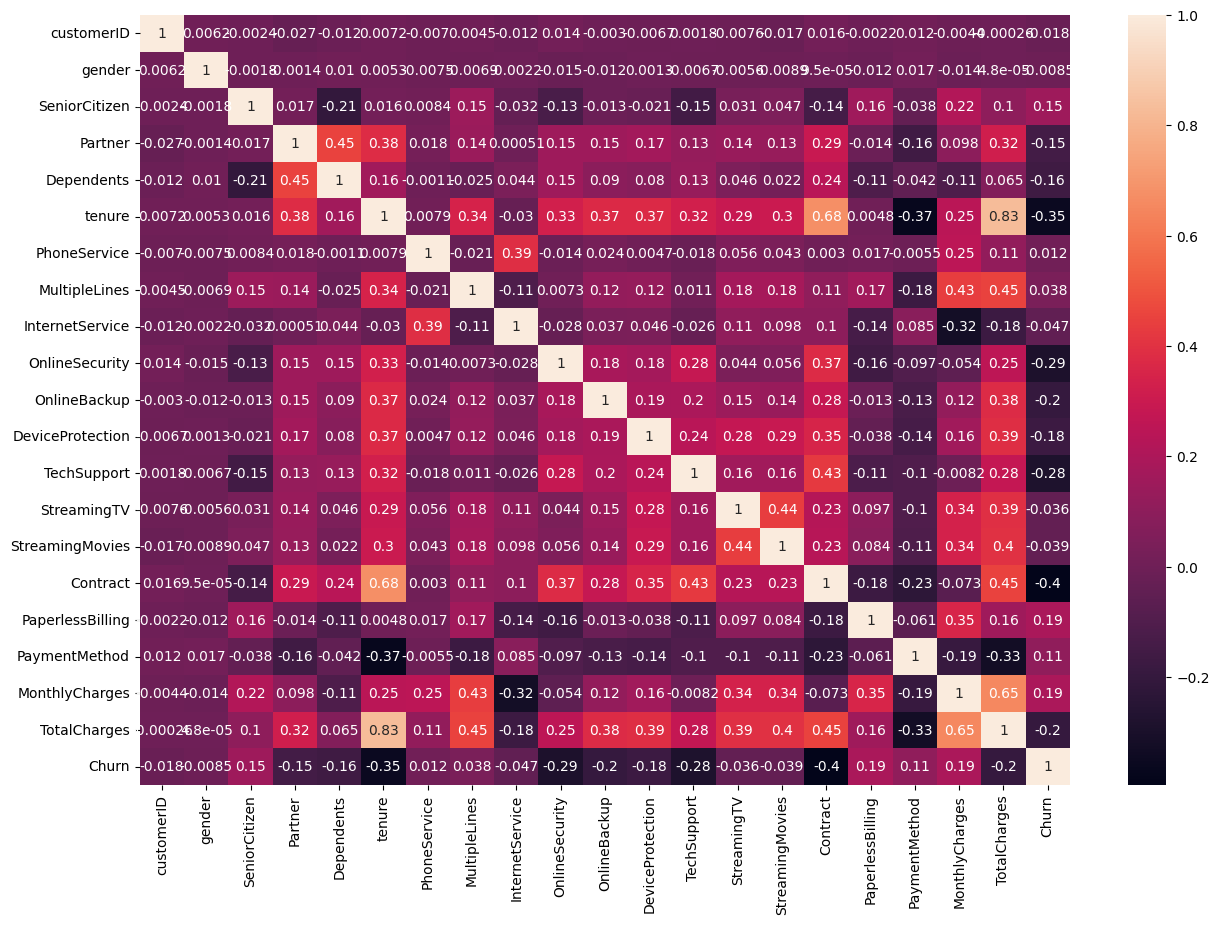

In [66]:
#Correlation Matrix Heatmap
plt.figure(figsize=(15,10))

sns.heatmap(df.corr(),annot=True)

# TRAIN TEST SPLIT

In [67]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(df.drop(columns='Churn'),df['Churn'],test_size=0.2,random_state=42)

# Decision Tree Classifier

In [68]:
from sklearn.tree import DecisionTreeClassifier

dtree=DecisionTreeClassifier()

# Hyperparameter tuning using grid searchCV

In [69]:
from sklearn.model_selection import GridSearchCV

param_grid={
    'max_depth': [2,4,6,8,10],
    'min_samples_leaf':[2,4,6,8,10],
    'min_samples_split':[2,4,6,8,10],
    'criterion':['gini','entropy'],
    'random_state':[0,42]
}

grid_search=GridSearchCV(estimator=dtree,param_grid=param_grid,cv=3,n_jobs=-1,verbose=2,scoring='accuracy')

grid_search.fit(X_train,y_train)

print(grid_search.best_params_)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits
{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 2, 'random_state': 42}


In [70]:
dtree=DecisionTreeClassifier(criterion='gini',max_depth=6,min_samples_leaf=4,min_samples_split=2,random_state=42)
dtree.fit(X_train,y_train)

print('Training Accuracy',dtree.score(X_train,y_train))
d_pred=dtree.predict(X_test)

Training Accuracy 0.8106666666666666


# Random Forest Classifier

In [71]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()

In [72]:
from sklearn.model_selection import GridSearchCV

param_grid={
    'max_depth':[2,4,6,8,10],
    'min_samples_leaf':[2,4,6,8,10],
    'min_samples_split':[2,4,6,8,10],
    'criterion':['gini','entropy'],
    'random_state':[0,42]
}

grid_search=GridSearchCV(estimator=rfc, param_grid=param_grid,cv=3,n_jobs=-1,verbose=2,scoring='accuracy')

grid_search.fit(X_train,y_train)

print(grid_search.best_params_)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits
{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 10, 'random_state': 0}


In [73]:
rfc=RandomForestClassifier(criterion= 'entropy', max_depth= 8, min_samples_leaf=4, min_samples_split= 10, random_state=0)
rfc.fit(X_train,y_train)
print("Training Accuracy RFC:",rfc.score(X_train,y_train))
r_pred=rfc.predict(X_test)

Training Accuracy RFC: 0.8380444444444445


# K nearest neighbors classifiers


In [74]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()

In [75]:
from sklearn.model_selection import GridSearchCV

param_grid={
    'n_neighbors':[2,4,6,8,10],
    'weights':['uniform','distance'],
    'algorithm':['auto','ball_tree','kd_tree','brute']
}

grid_search=GridSearchCV(estimator=knn,param_grid=param_grid,cv=3,verbose=2,n_jobs=-1,scoring='accuracy')

grid_search.fit(X_train,y_train)

print(grid_search.best_params_)

Fitting 3 folds for each of 40 candidates, totalling 120 fits
{'algorithm': 'auto', 'n_neighbors': 10, 'weights': 'uniform'}


In [76]:
knn=KNeighborsClassifier(algorithm='auto',n_neighbors=10,weights='uniform')

knn.fit(X_train,y_train)
print('Accuracy Score:',knn.score(X_train,y_train))
k_pred=knn.predict(X_test)

Accuracy Score: 0.7441777777777778


# Model evaluation

# Confusion matrix heatmap

Text(0.5, 1.0, 'KNN confusion matrix')

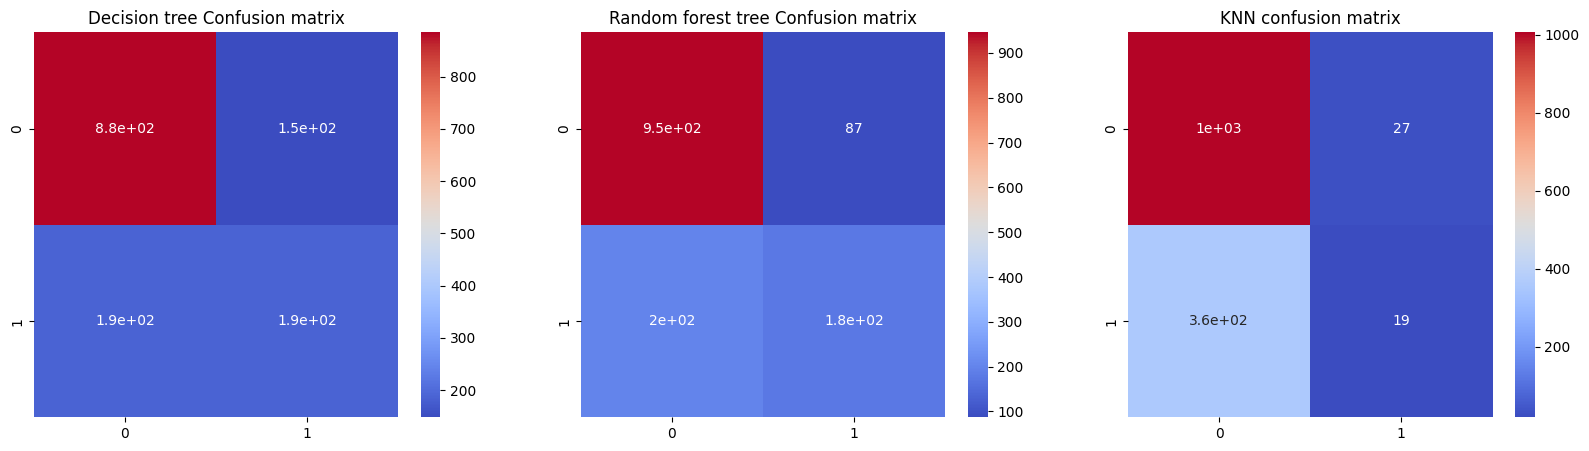

In [77]:
from sklearn.metrics import confusion_matrix
fig,ax=plt.subplots(1,3,figsize=(20,5))
#confusion_matrix(y_test,d_pred)
sns.heatmap(confusion_matrix(y_test,d_pred),annot=True,ax=ax[0],cmap='coolwarm').set_title('Decision tree Confusion matrix')

sns.heatmap(confusion_matrix(y_test,r_pred),annot=True,ax=ax[1],cmap='coolwarm').set_title('Random forest tree Confusion matrix')

sns.heatmap(confusion_matrix(y_test,k_pred),annot=True,ax=ax[2],cmap='coolwarm').set_title('KNN confusion matrix')

Random Forest has the highest true negative and fairly ok True Positive

# ROC curves


Text(0.5, 1.0, 'ROC Curve - Random forest')

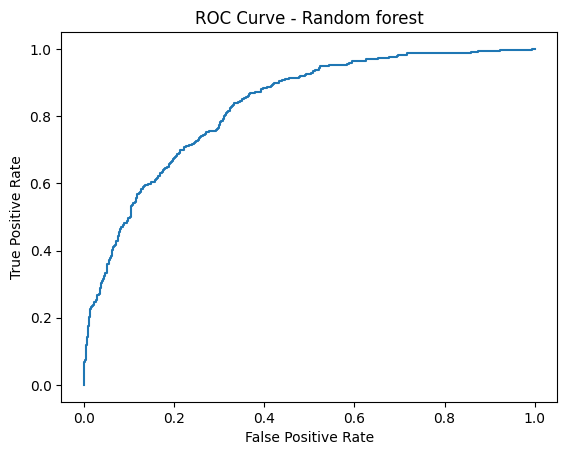

In [78]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, rfc.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random forest")


# Classification Report

In [79]:
from sklearn.metrics import classification_report

print('Decision Tree Classification Report: \n',classification_report(y_test,d_pred))
print('Random Forest Classification Report: \n',classification_report(y_test,r_pred))
print('KNN Classification Report: \n',classification_report(y_test,k_pred))


Decision Tree Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.86      0.84      1033
           1       0.56      0.50      0.53       374

    accuracy                           0.76      1407
   macro avg       0.69      0.68      0.68      1407
weighted avg       0.75      0.76      0.76      1407

Random Forest Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.92      0.87      1033
           1       0.67      0.47      0.55       374

    accuracy                           0.80      1407
   macro avg       0.75      0.69      0.71      1407
weighted avg       0.78      0.80      0.78      1407

KNN Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.97      0.84      1033
           1       0.41      0.05      0.09       374

    accuracy                           0.73      1407
   macro avg       0.

# Model Metrics

Text(0.5, 1.0, 'f1_Score')

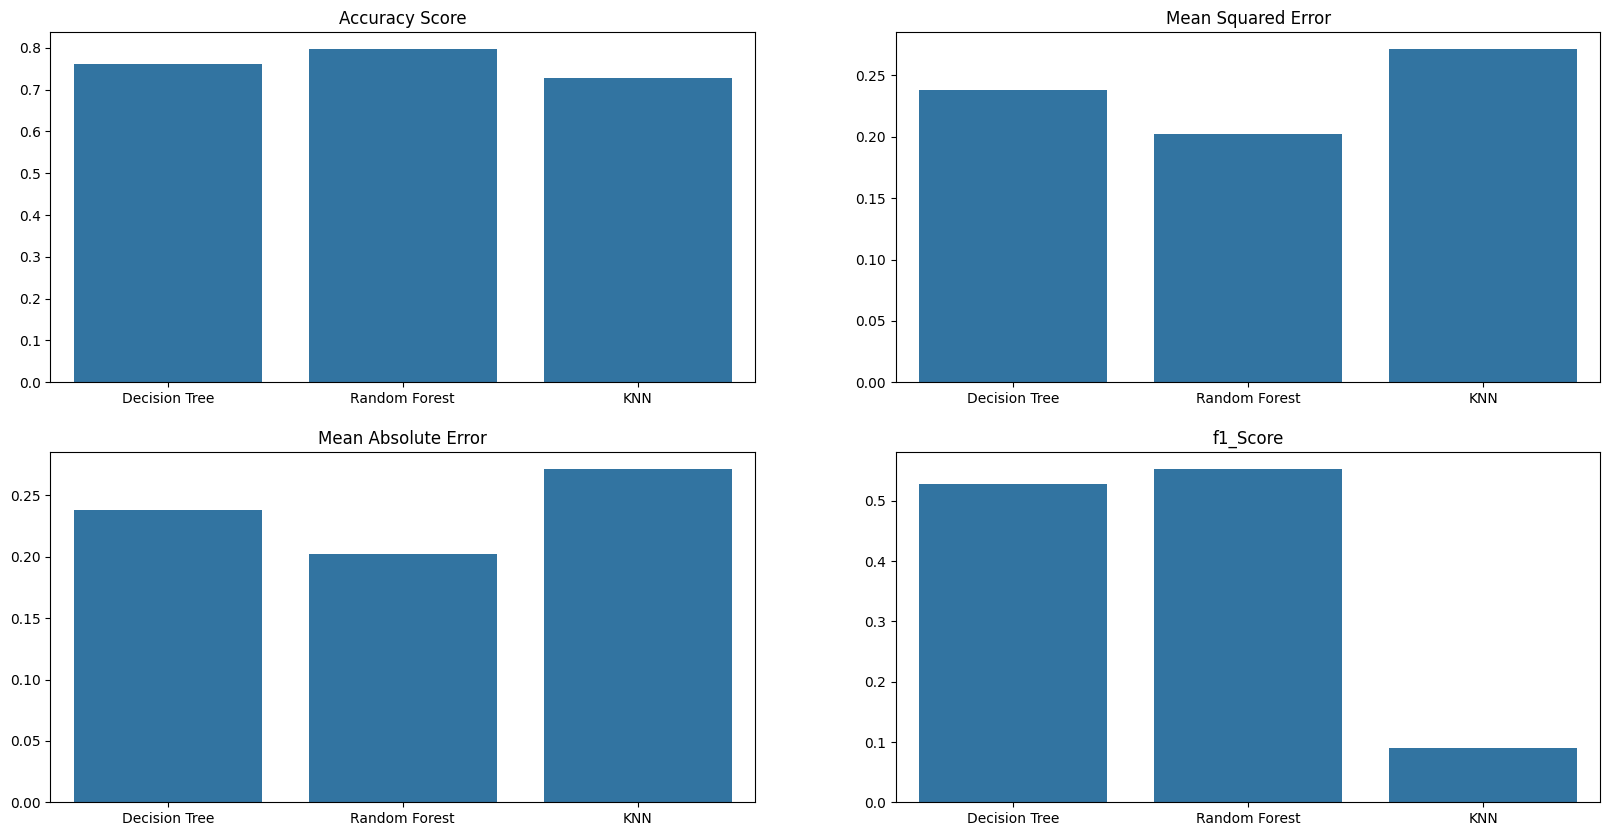

In [80]:
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, f1_score


fig,ax=plt.subplots(2,2,figsize=(20,10))

sns.barplot(x=['Decision Tree','Random Forest','KNN'],y=[accuracy_score(y_test,d_pred),accuracy_score(y_test,r_pred),accuracy_score(y_test,k_pred)],ax=ax[0,0]).set_title('Accuracy Score')
sns.barplot(x=['Decision Tree','Random Forest','KNN'],y=[mean_squared_error(y_test,d_pred),mean_squared_error(y_test,r_pred),mean_squared_error(y_test,k_pred)],ax=ax[0,1]).set_title('Mean Squared Error')
sns.barplot(x=['Decision Tree','Random Forest','KNN'],y=[mean_absolute_error(y_test,d_pred),mean_absolute_error(y_test,r_pred),mean_absolute_error(y_test,k_pred)],ax=ax[1,0]).set_title('Mean Absolute Error')
sns.barplot(x=['Decision Tree','Random Forest','KNN'],y=[f1_score(y_test,d_pred),f1_score(y_test,r_pred),f1_score(y_test,k_pred)],ax=ax[1,1]).set_title('f1_Score')

# Feature Importance

Text(0.5, 1.0, 'Feature importance in Random Forest')

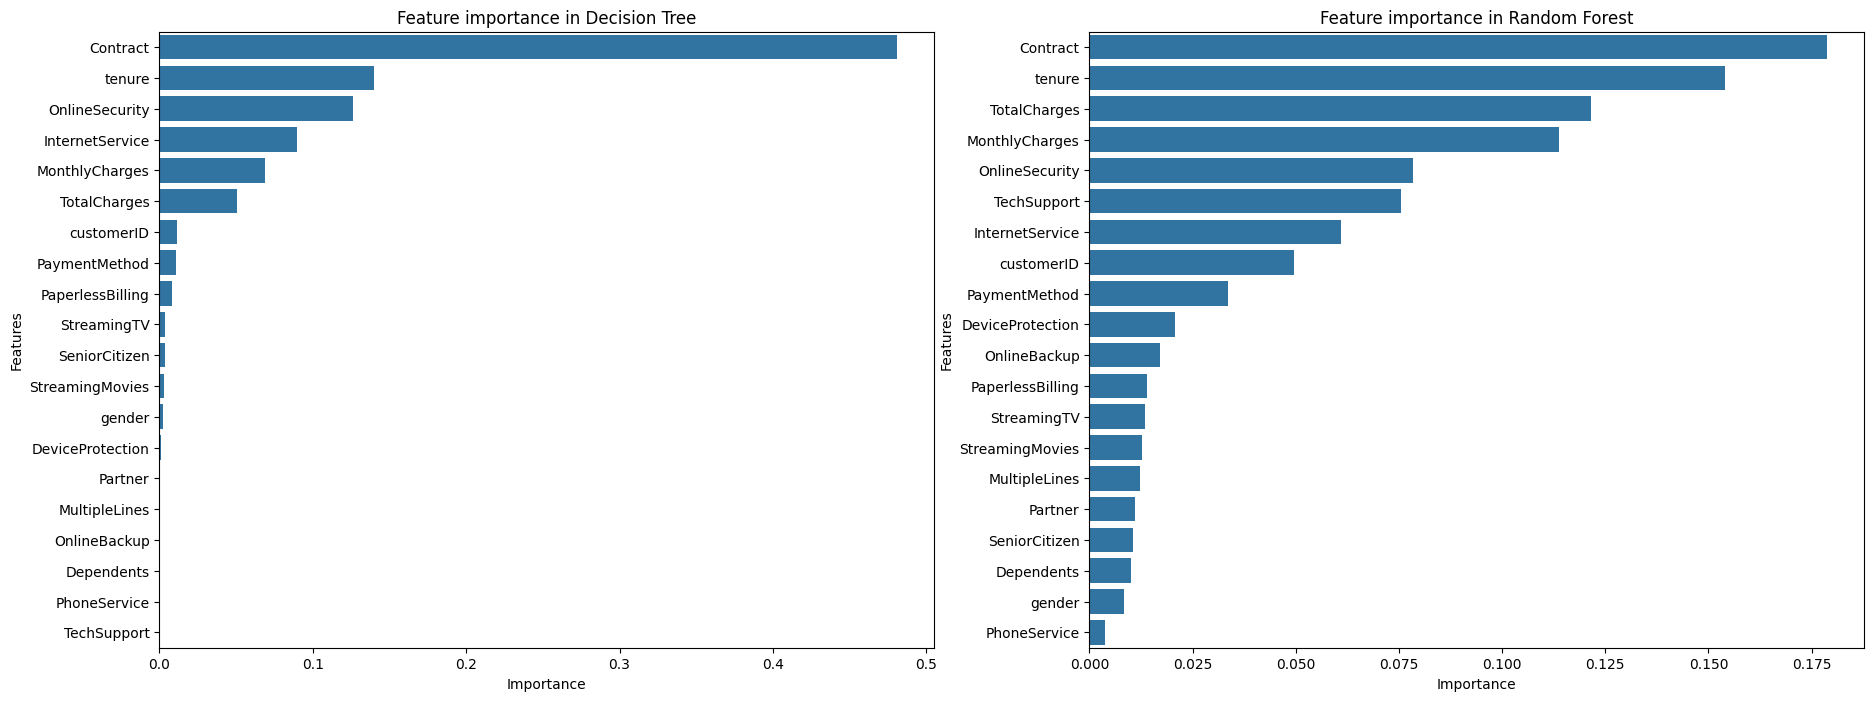

In [81]:
fig,ax=plt.subplots(1,2,figsize=(22,8))


feature_df=pd.DataFrame({'Features': X_train.columns,'Importance': dtree.feature_importances_})
feature_df.sort_values('Importance',ascending=False,inplace=True)
sns.barplot(x='Importance',y='Features',data=feature_df,ax=ax[0]).set_title('Feature importance in Decision Tree')

feature_df=pd.DataFrame({'Features':X_train.columns,'Importance':rfc.feature_importances_})
feature_df.sort_values('Importance',ascending=False,inplace=True)
sns.barplot(x='Importance',y='Features',data=feature_df,ax=ax[1]).set_title('Feature importance in Random Forest')

From both the models, it is clear that the tenure, monthly charges, and total charges are the most important features for predicting the customer churn. Therefore, the company should focus on these features to reduce the customer churn.

Conclusion

From the exploratory data analysis, I came to know that, the senior citizens have lower churn count whereas the customers who are single or don't have dependents ahve higher churn count. In addition to that, customers are more satified with the streaming services than other services such as Online backup and Device protection, which has resulted in lower churn count in customer with streaing services than the other services.

The tenure have an inverse relation with churn count, where customer with tenure shorter than 5 months have higher churn count. Moreover, the customers with month-to-month contract have higher churn count as compared to those with one or two year contract which also proves that customer who have longer contract with the company have lower churn count.

It has been observed that the customers with higher monthly charges and lower total charges have higher churn count. Therefore, the company should focus on lowering the monthly charges for the customers in order to reduce the churn count. From the feature importance, it is clear that the tenure, contract, monthly charges, and total charges are the most important features for predicting the customer churn. Therefore, the company should focus on these features to reduce the customer churn.

Coming to the machine learning models, I have used three models - Decision Tree Classifier, Random Forest Classifier, and K Nearest Neighbors Classifier. The Random Forest Classifier has the highest accuracy i.e. 82% and F1 Score, and lowest mean squared error, mean absolute error. Therefore, the Random Forest Classifier is a good fit for predicting the customer churn.b

In [82]:
list(X_train.columns)

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges']

In [83]:
df.shape

(7032, 21)